# Step 3: Visualizing
Even though we did not get a strong correlations, lets visualize our enhanced accident data with weather info. First, lets import the necesary libraries:

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (18.,10.)})
sns.set_style("whitegrid")
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

Now lets read our processed csv files containing accident data with weather conditions and the same info but grouped by day:

In [5]:
data = pd.read_csv('data/results/detailed.csv', dtype={"date":"str"}, parse_dates=["date"])
grouped = pd.read_csv('data/results/grouped.csv')

/var/folders/zt/x4f866fn6v5b11fyl7jzdnk80000gn/T/ipykernel_5462/736845753.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/results/detailed.csv', dtype={"date":"str"}, parse_dates=["date"])


Lets start exploring the data set. Lets plot a histogram of accidents over time:

<AxesSubplot: xlabel='date', ylabel='Count'>

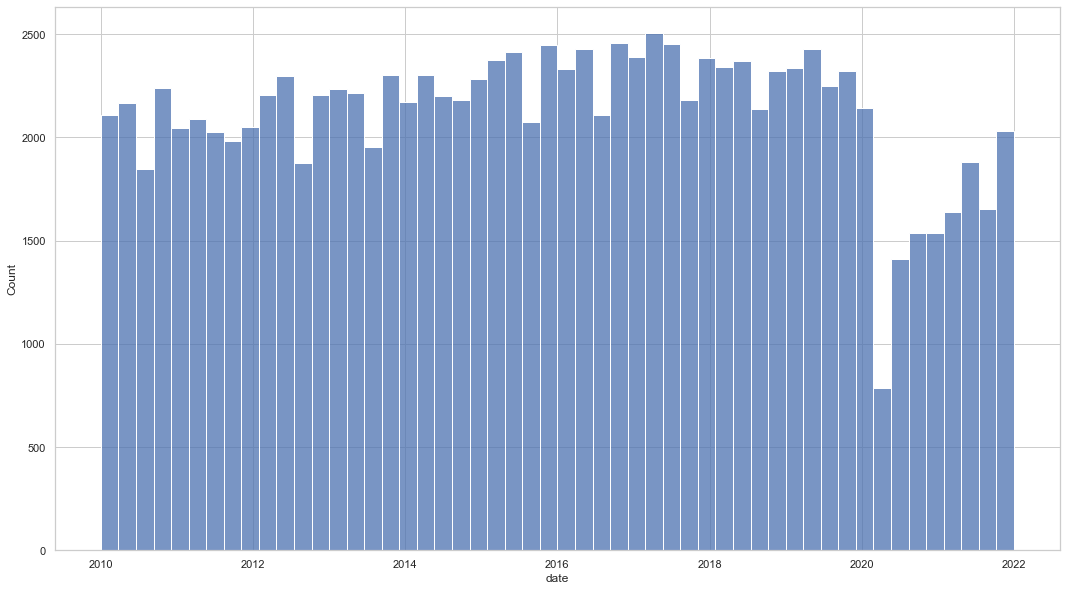

In [8]:
sns.histplot(x=data.date)

Accidents seem pretty evenly distributed over time. We can see a tip in the first part of 2020. Surely it must be related to the COVID-19 pandemic. Lets dive deeper into the data we have:

In [10]:
data.columns

Index(['Unnamed: 0', 'case_id', 'district_id', 'district_name',
       'neighborhood_id', 'neighborhood_name', 'street_code', 'street_name',
       'postal_code', 'type_day', 'cyrcadian', 'cause_incident', 'n_deaths',
       'n_wounded_mild', 'n_wounded_severe', 'n_victims', 'n_vehicles', 'date',
       'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'precipitation',
       'rain', 'windspeed_100m', 'winddirection_100m',
       'soil_temperature_100_to_255cm', 'soil_moisture_100_to_255cm'],
      dtype='object')

In [31]:
by_district = data.groupby(["district_name"]).sum()


In [33]:
sns.histplot(x=by_district["date"], hue=data.district_name)

KeyError: 'date'

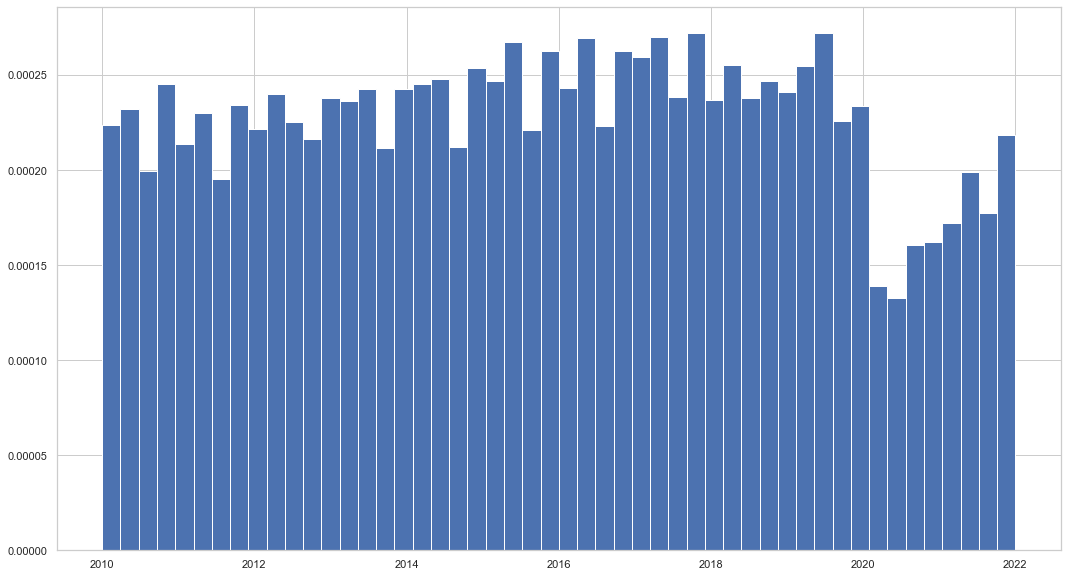

In [25]:
plt.hist(data["date"],bins=50, density=True, stacked=True, histtype='barstacked');

Looks like the Eixample is the area with most incidents. Lets have a look at the incident type now:

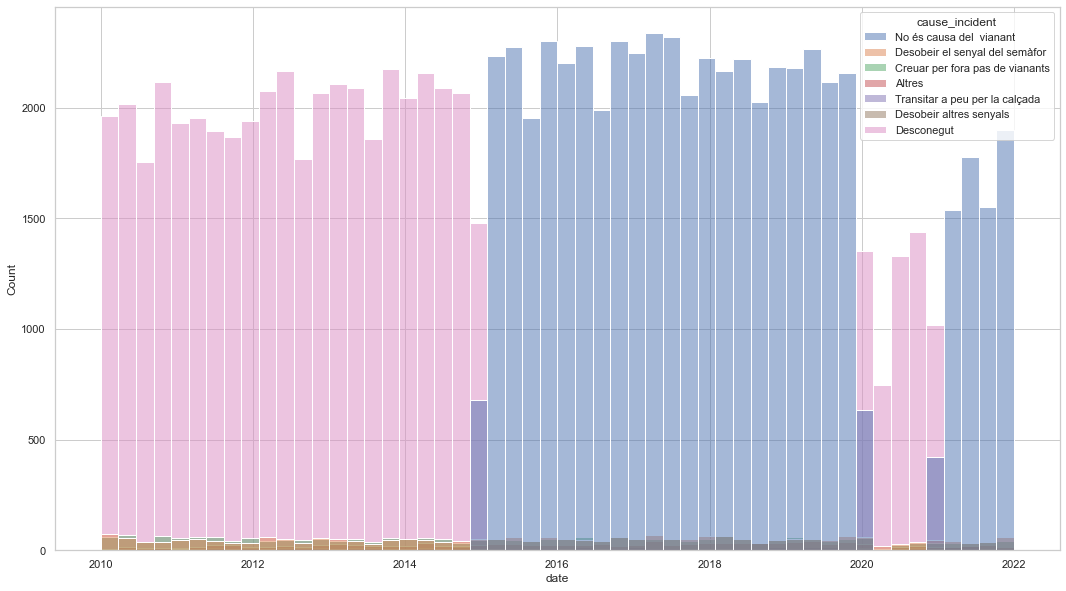

In [13]:
sns.histplot(x=data.date, hue=data.cause_incident);

This plot is suggesting there has been some sort of methodology change. Most fo the cases are being classified as "Desconegut" or "No és causa del vianant"

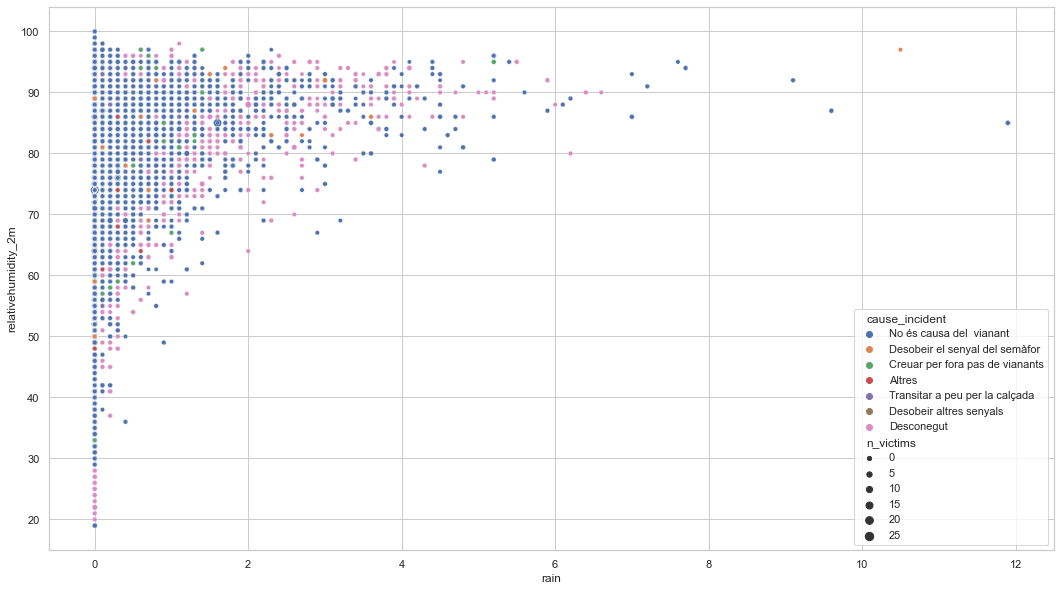

In [7]:
sns.scatterplot(x="rain", y="relativehumidity_2m", size="n_victims", hue = "cause_incident", data = data);